# Making Figures for Proposal

In [1]:
import lsdtopytools as lsd
from functions import *
import geopandas as gpd
import pandas as pd
import seaborn as sns
import rasterio
import rasterio.plot
from osgeo import gdal


/sciclone/home/ntlewis/research/.conda/lib/python3.8/site-packages/lsdtopytools/geoconvtools.py:79: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit(nopython = False)
/sciclone/home/ntlewis/research/.conda/lib/python3.8/site-packages/lsdtopytools/numba_tools.py:73: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit(nopython=False, parallel = True)


In [2]:
# NE bounds for quadrangles
pound_ap = (37.125,-82.5)
tazwell_south_vr = (37.125,-81.5)
montvale_br = (37.5,-79.625)
dillwyn_p = (37.625,-78.375)
bounds_list=[pound_ap,tazwell_south_vr,montvale_br,dillwyn_p]
color_list=['g','y','b','r']

In [3]:
ap_df, ap_dem = generate_ksn(north=pound_ap[0],east=pound_ap[1],name='pound_ap.tiff')
vr_df, vr_dem = generate_ksn(north=tazwell_south_vr[0],east=tazwell_south_vr[1],name='tazwell_south_vr.tiff')
br_df, br_dem = generate_ksn(north=montvale_br[0],east=montvale_br[1],name='montvale_br.tiff')
p_df, p_dem = generate_ksn(north=dillwyn_p[0],east=dillwyn_p[1],name='dillwyn_p.tiff')
df_list = [ap_df,vr_df,br_df,p_df] 

Loading the raster from file: /sciclone/home/ntlewis/research/working_files/data/pound_ap.tiff
LOADING TOOK 0.005734920501708984
I am recasting your nodata values to -9999 (standard LSDTT)
PREPROC TOOK 0.0518488883972168
Alright, let me summon control upon the c++ code ...
Got it.
INGESTINGINTO CPP TOOK 0.0028557777404785156
I am an empty LSDJunctionNetwork
Nrows:1509 and ncols:1218
out Nrows:1509 and out ncols:1218

I am an empty LSDJunctionNetwork
Yes, yes, we know. Ignore the above depressing debugging text, that's perfectly normal to feel empty sometimes.
FINALISATION TOOK 0.0002243518829345703
lsdtopytools is now ready to roll!
Carving: implementation of Lindsay (2016) DOI: 10.1002/hyp.10648
Filling: implementation of Wang and Liu (2006): https://doi.org/10.1080/13658810500433453
Processing...
I am going to carve/breach your depressions in order to force flow paths.
I am using an algorithm from Lindsay et al., 2016 DOI:https://doi.org/10.1002/hyp.10648
DEM ready for flow routines!

In [4]:
ninety_five = lambda df : np.percentile(df.m_chi,95)
ninety_five_dict = dict(zip(['ap','vr','br','p'],[ninety_five(x) for x in [ap_df,vr_df,br_df,p_df]]))
print(ninety_five_dict)

{'ap': 5.925240993499753, 'vr': 6.8684983253479, 'br': 6.4033080339431745, 'p': 1.2561861515045165}


In [5]:
q2 = lambda df : df.elevation.describe()['50%']
q2_dict = dict(zip(['ap','vr','br','p'],[q2(x) for x in [ap_df,vr_df,br_df,p_df]]))
print(q2_dict)

{'ap': 548.8818359375, 'vr': 847.30322265625, 'br': 351.63294982910156, 'p': 151.77196502685547}


In [ ]:
dil = rasterio.open('data/dillwyn_p.tiff')

In [ ]:
elevation=dil.read(1)[dil.read(1)>=0]
elevation

Text(0.5, 1.0, 'Piedmont, Dillwyn Quadrangle')

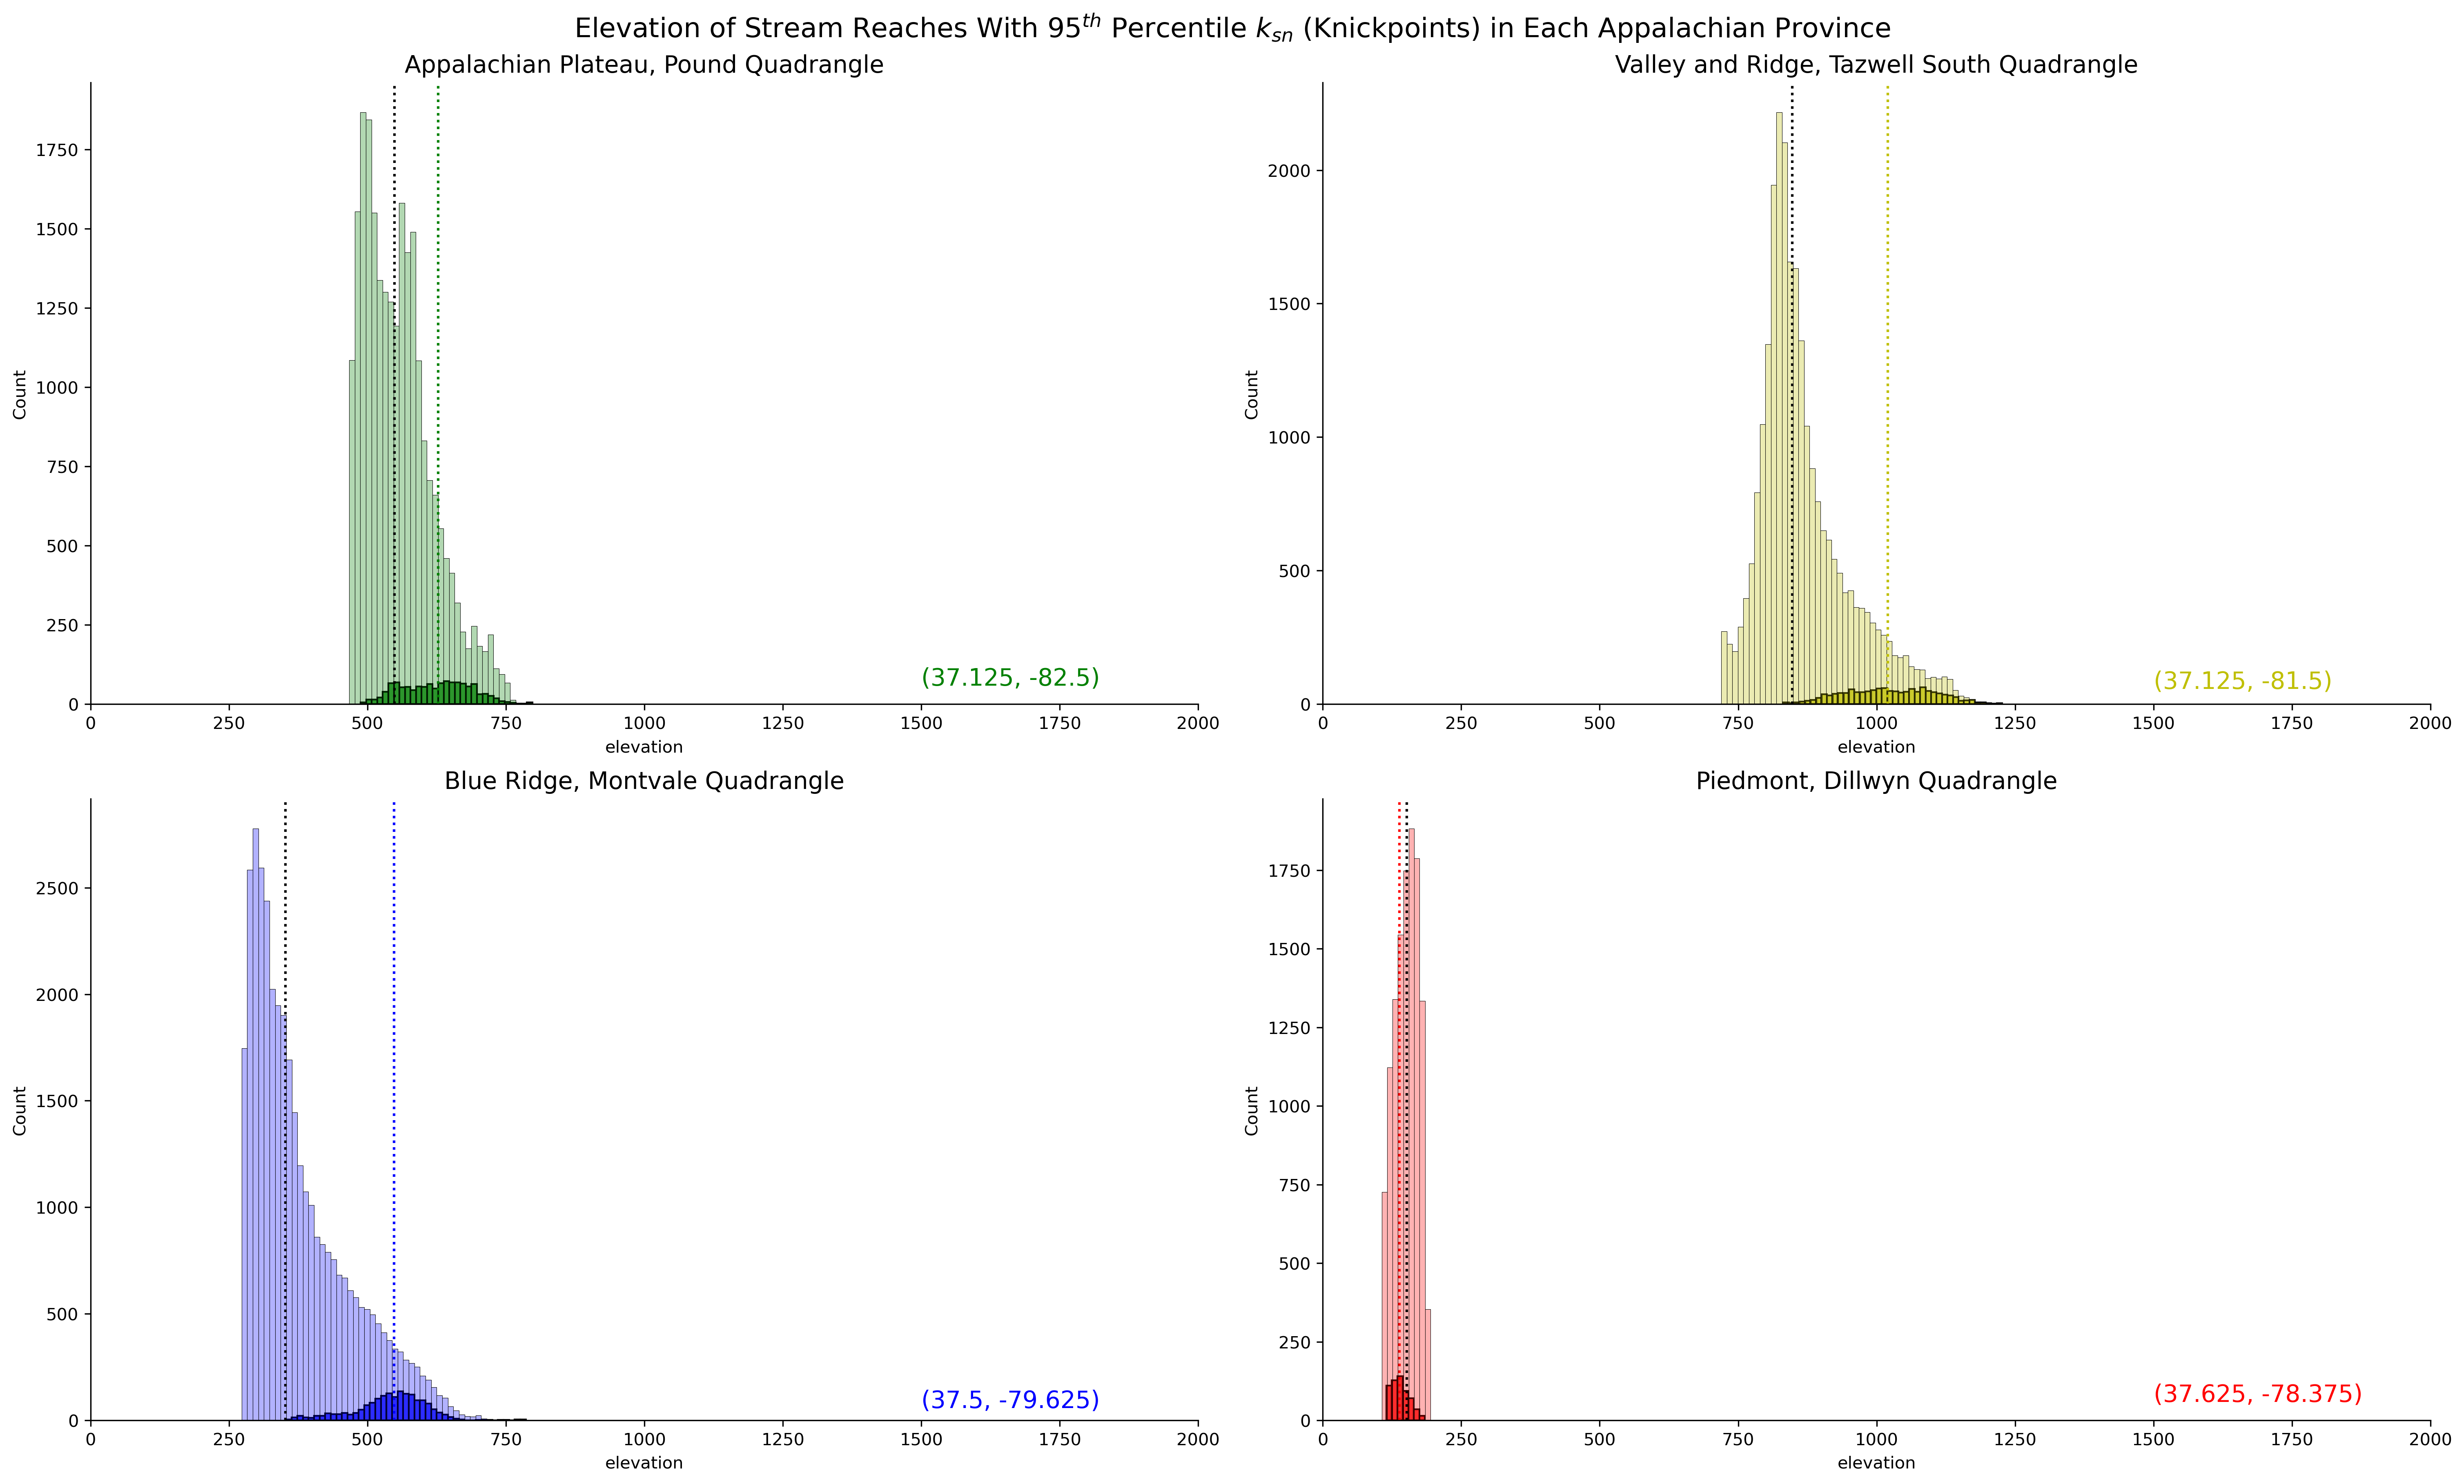

In [6]:
fig, ax = plt.subplots(2,2, figsize=(20,12), dpi=300, constrained_layout=True)
fig.suptitle('Elevation of Stream Reaches With $95^{th}$ Percentile $k_{sn}$ (Knickpoints) in Each Appalachian Province', fontsize=16)
sns.despine()
make_fig1(df_list=df_list, _95_dict=ninety_five_dict, q2_dict=q2_dict, color_list=color_list, bounds_list=bounds_list, ax=ax)
ax[0,0].set_title('Appalachian Plateau, Pound Quadrangle', fontsize=14)
ax[0,1].set_title('Valley and Ridge, Tazwell South Quadrangle', fontsize=14)
ax[1,0].set_title('Blue Ridge, Montvale Quadrangle', fontsize=14)
ax[1,1].set_title('Piedmont, Dillwyn Quadrangle', fontsize=14)